# Comparing the mse of the LSTM, physical model and the boosted model

In [97]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
from itertools import product


In [98]:
ds_lstm = xr.open_dataset("../data/processed/mse_LSTM.nc")
ds_phys = xr.open_dataset("../data/processed/mse_physical_model.nc")
ds_boost = xr.open_dataset("../data/processed/mse_boosted_model.nc")
ds_boost2 = xr.open_dataset("../data/processed/mse_boosted_model2.nc")
ds_lstm_d_range = xr.open_dataset("../data/processed/mse_LSTM_d-range.nc")
ds_lstm_h_range = xr.open_dataset("../data/processed/mse_LSTM_h-range.nc")
ds_boost_d_range = xr.open_dataset("../data/processed/mse_boosted_d-range.nc")
ds_boost_d_range2 = xr.open_dataset("../data/processed/mse_boosted_d-range2.nc")
ds_boost_h_range = xr.open_dataset("../data/processed/mse_boosted_model_h-range.nc")

In [68]:
ds_boost2

<xarray.Dataset> Size: 2kB
Dimensions:  (k: 20, c: 11)
Coordinates:
  * k        (k) int32 80B 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20
  * c        (c) float64 88B 11.0 11.5 12.0 12.5 13.0 ... 14.5 15.0 15.5 16.0
Data variables:
    mse      (k, c) float64 2kB ...
Attributes:
    epochs:    100
    patience:  20

Align dimensions of datasets

In [81]:
ds_lstm, ds_phys, ds_boost, ds_boost2 = xr.align(
    ds_lstm, ds_phys, ds_boost, ds_boost2, join="exact"
)

In [82]:
ds_lstm_d_range, ds_lstm_h_range, ds_boost_d_range, ds_boost_h_range = xr.align(
  ds_lstm_d_range, ds_lstm_h_range, ds_boost_d_range, ds_boost_h_range, join = "exact"
)

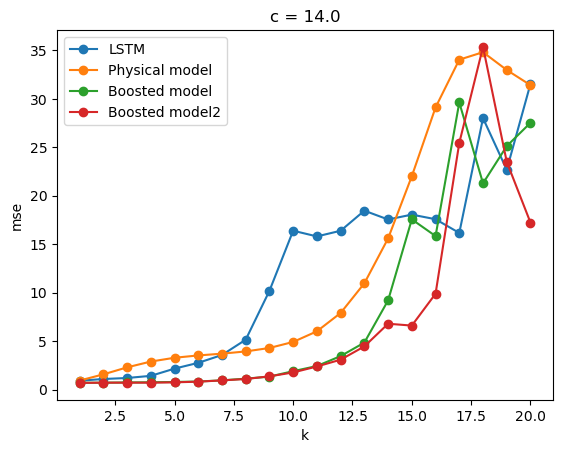

In [83]:
fig, ax = plt.subplots()


ds_lstm.mse.plot(marker="o", label="LSTM")
ds_phys.mse.sel(c=14).plot(marker="o",label="Physical model")
ds_boost.mse.sel(c=14).plot(marker="o",label="Boosted model")
ds_boost2.mse.sel(c=14).plot(marker="o",label="Boosted model2")

ax.legend()

In [84]:
plt.style.use("default")

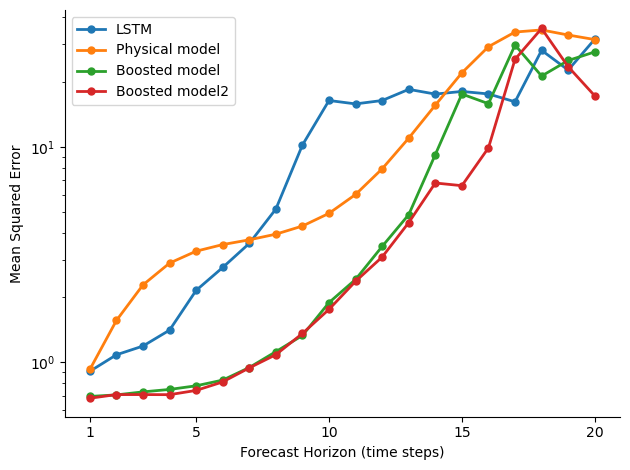

In [75]:
xticks = [1,5,10,15,20]
marker_size = 5
linewidth = 2
fig, ax = plt.subplots()
ax.set_yscale("log")
ds_lstm.mse.plot(ax=ax, marker="o", linestyle="-", label="LSTM", markersize=marker_size, linewidth=linewidth)
ds_phys.mse.sel(c=14).plot(ax=ax, marker="o", linestyle="-", label="Physical model", markersize=marker_size, linewidth=linewidth)
ds_boost.mse.sel(c=14).plot(ax=ax, marker="o", linestyle="-", label="Boosted model", markersize=marker_size, linewidth=linewidth)
ds_boost2.mse.sel(c=14).plot(ax=ax, marker="o", linestyle="-", label="Boosted model2", markersize=marker_size, linewidth=linewidth)

ax.set_ylabel("Mean Squared Error")
ax.set_xlabel("Forecast Horizon (time steps)")
ax.set_xticks(xticks)
ax.set_title("")
fig.tight_layout()


ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)


ax.legend()

In [76]:
from pathlib import Path

FIGURES = Path("../figures/boosting/base2")
FIGURES.mkdir(parents=True, exist_ok=True)


In [78]:
xticks = [1,5,10,15,20]

for c in np.linspace(11,16,11):
    fig, ax = plt.subplots()

    ax.set_yscale("log")
    ds_lstm.mse.plot(ax=ax, marker="o", linestyle="-", label="LSTM")
    ds_phys.mse.sel(c=c).plot(ax=ax, marker="o", linestyle="-", label="Physical model")
    ds_boost2.mse.sel(c=c).plot(ax=ax, marker="o", linestyle="-", label="Boosted model")
    
    ax.set_ylabel("Mean Squared Error")
    ax.set_xlabel("Forecast Horizon (time steps)")
    ax.set_xticks(xticks)
    ax.set_title("")
    fig.tight_layout()


    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.legend()

    fig.savefig(FIGURES / f"mse_vs_k_c{c}.png", dpi=300, bbox_inches="tight")
    plt.close(fig)  # important!

# Plot figures comparing h-range 

In [85]:
c_range = np.linspace(11,16,11)
k_range = [5,10,15]
configs = list(product(k_range, c_range))


In [90]:
from pathlib import Path

FIGURES = Path("../figures/boosting/h-range")
FIGURES.mkdir(parents=True, exist_ok=True)

In [91]:
for k, c in configs:

  fig, ax = plt.subplots()
  # ax.set_yscale("log")
  ds_lstm_h_range.mse.sel(k=k).plot(ax=ax, marker="o", linestyle="-", label="LSTM")
  ds_boost_h_range.mse.sel(c=c, k=k).plot(ax=ax, marker="o", linestyle="-", label="Boosted Model")


  ax.set_ylabel("MSE")
  ax.set_xlabel("Hidden size")
  ax.set_title("")
  fig.tight_layout()
  ax.spines["top"].set_visible(False)
  ax.spines["right"].set_visible(False)
  ax.legend()

  fig.savefig(FIGURES / f"mse_vs_h_k{k}_c{c}.png", dpi=300, bbox_inches="tight")
  plt.close(fig)  
  

# Plot figures comparing data size


In [92]:
FIGURES = Path("../figures/boosting/d-range")
FIGURES.mkdir(parents=True, exist_ok=True)

/var/folders/84/c953fcs17cv2r4f3skfjn4nh0000gn/T/ipykernel_12953/1659231071.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


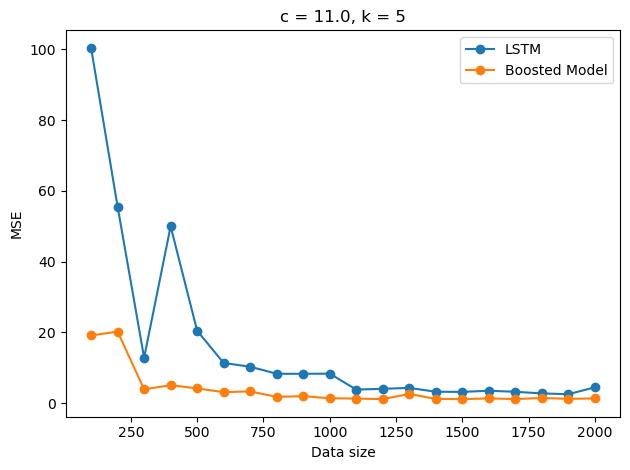

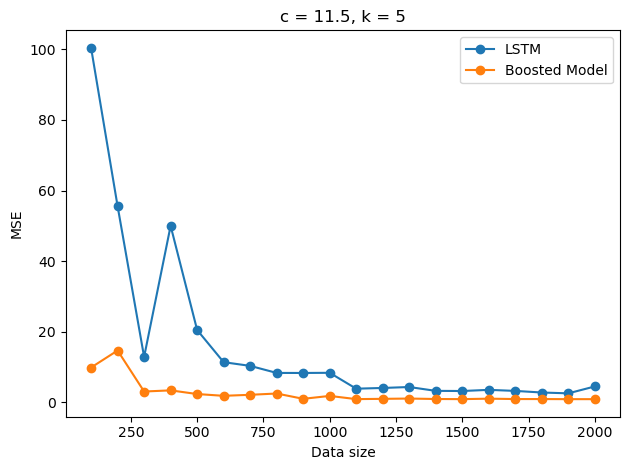

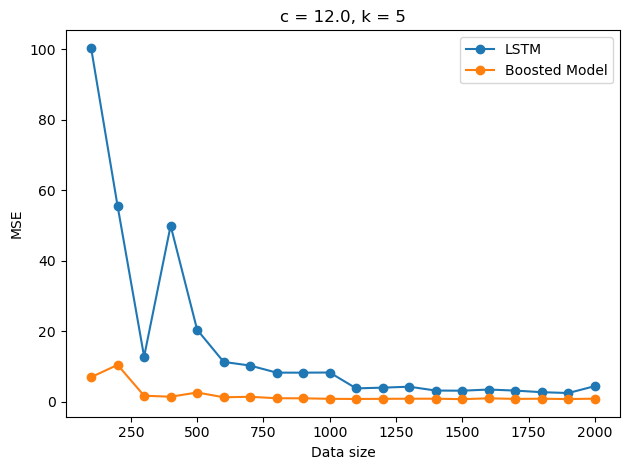

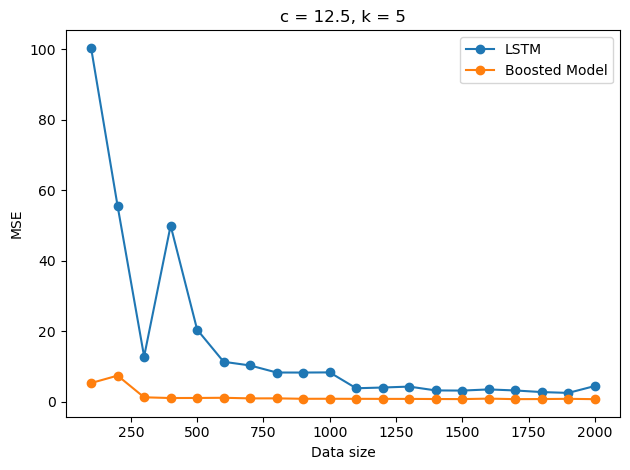

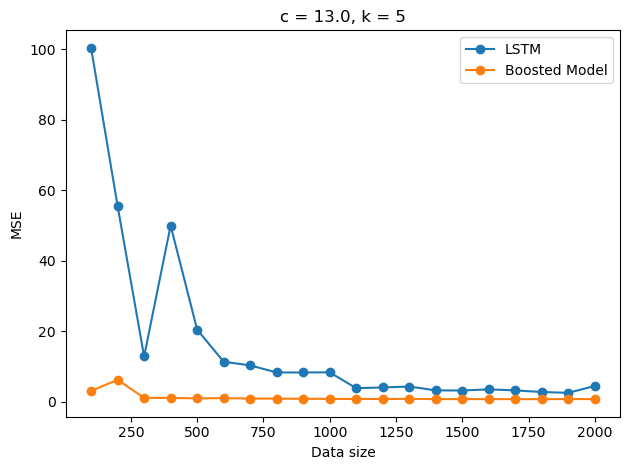

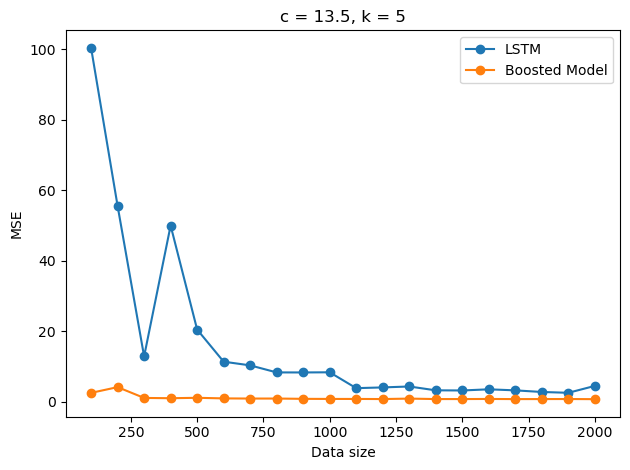

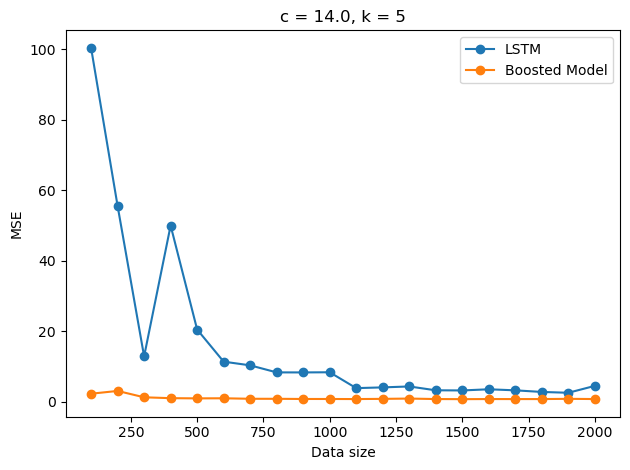

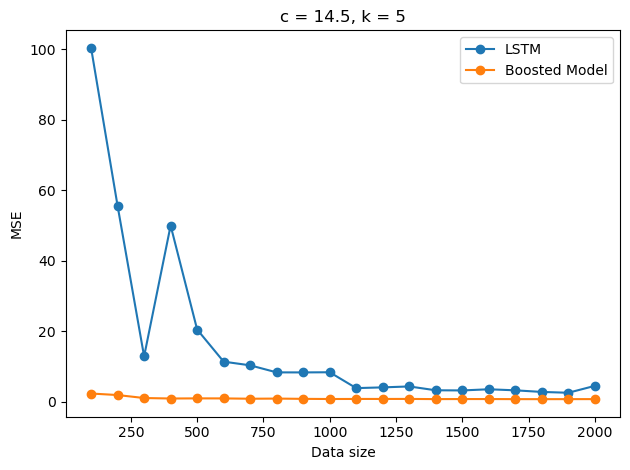

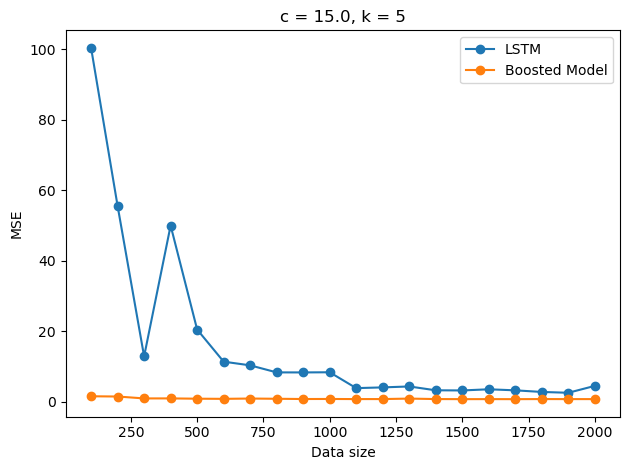

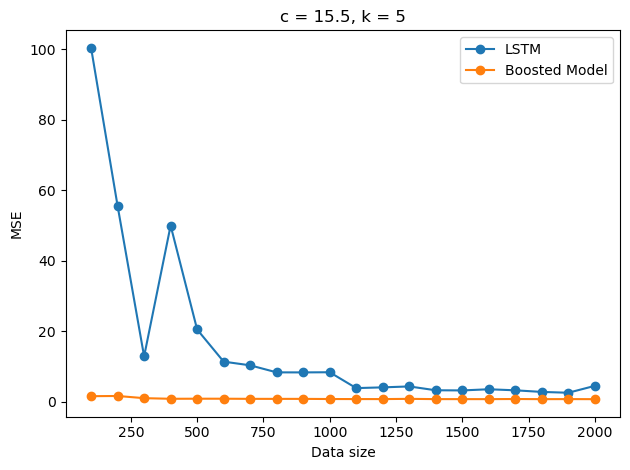

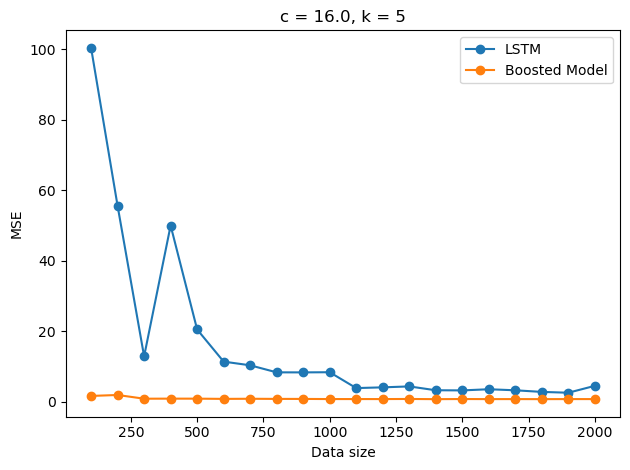

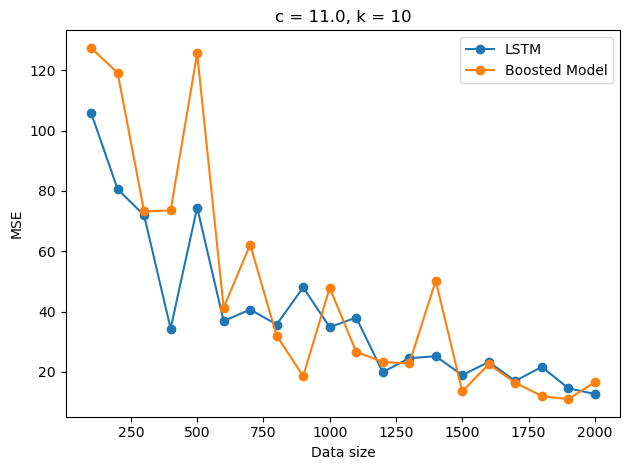

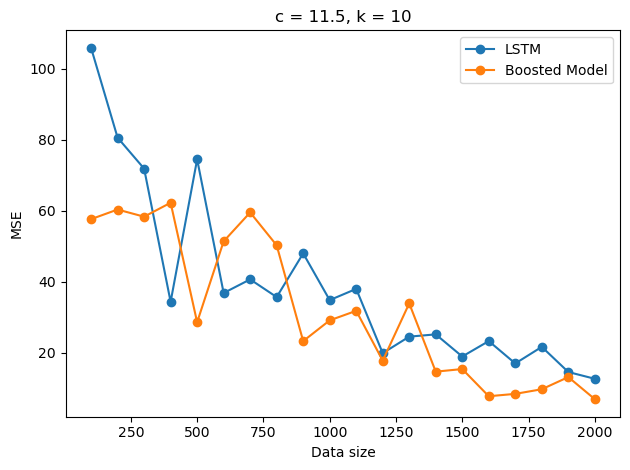

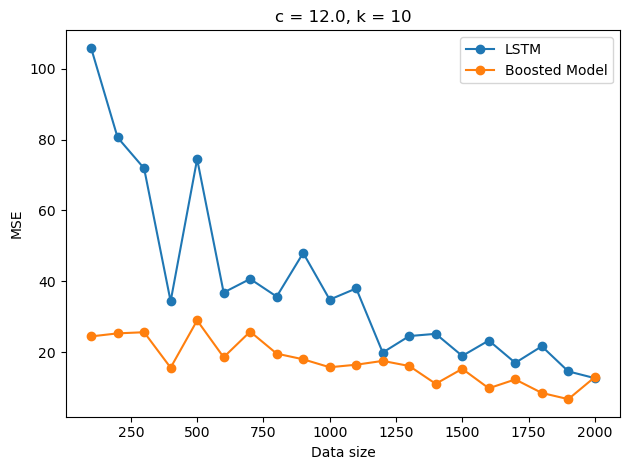

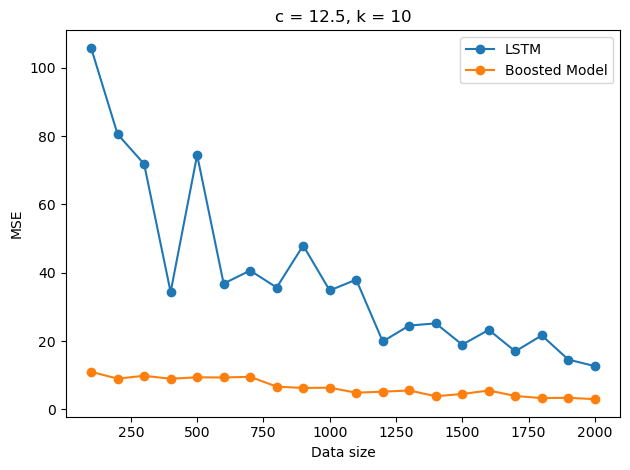

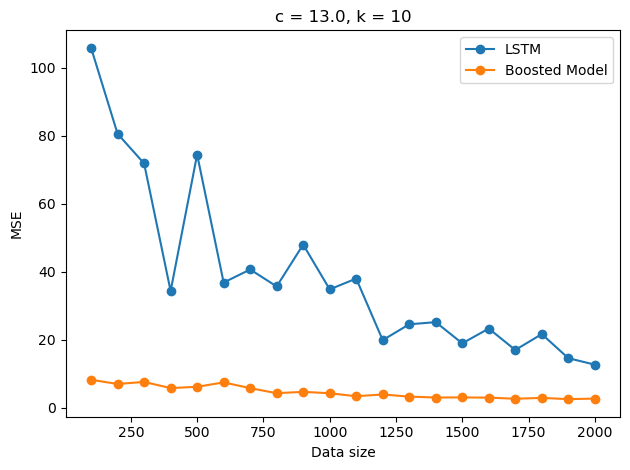

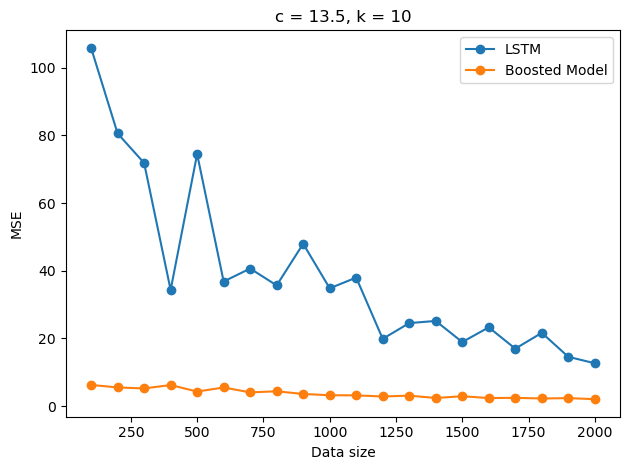

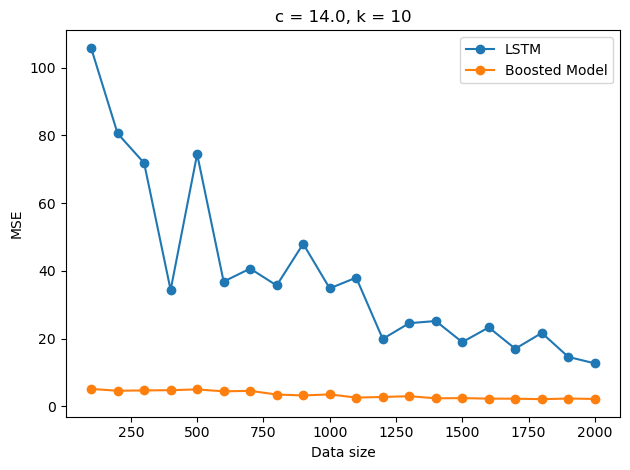

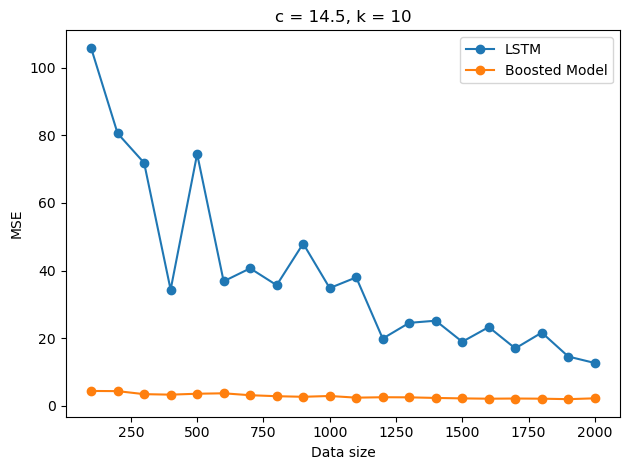

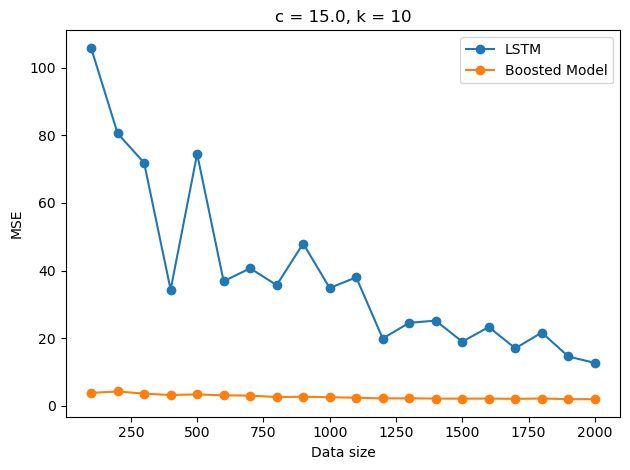

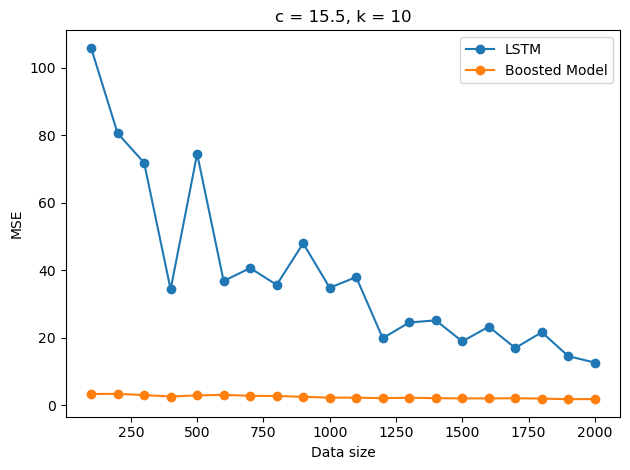

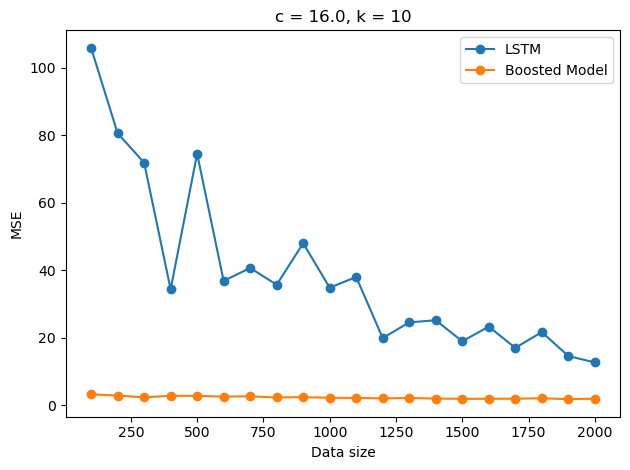

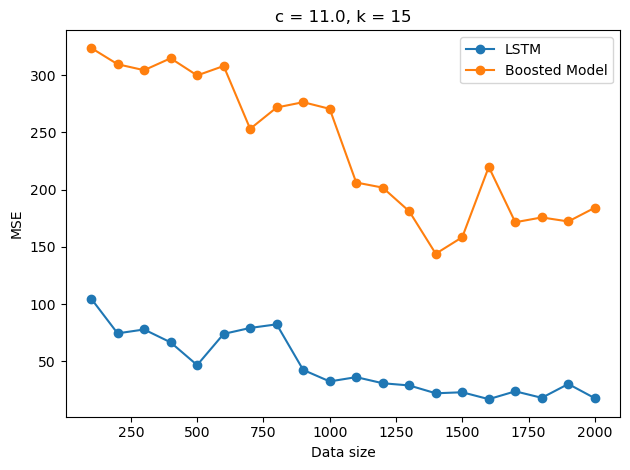

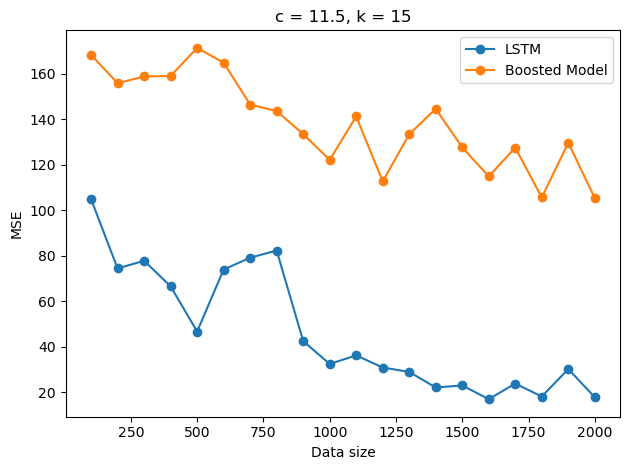

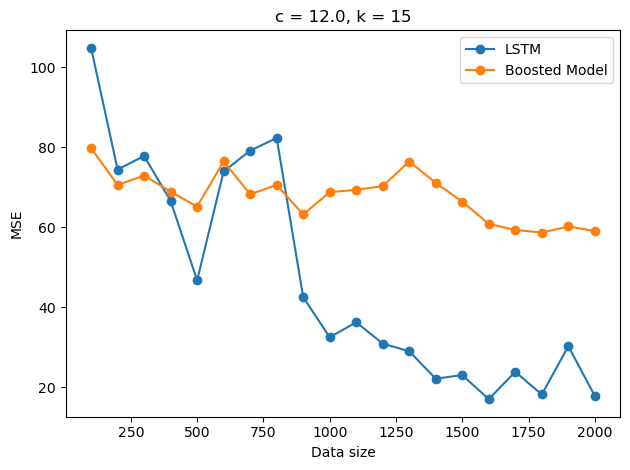

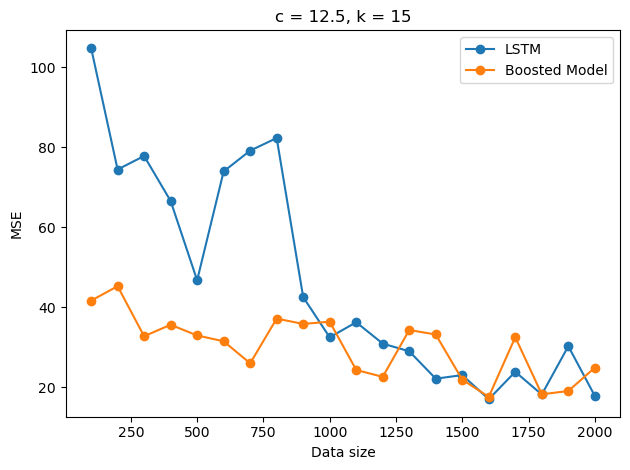

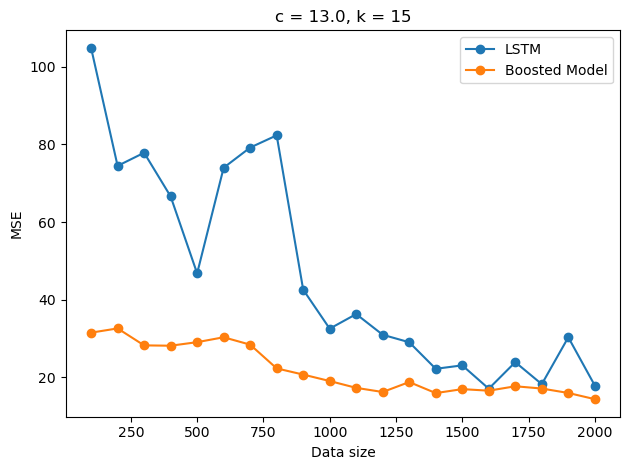

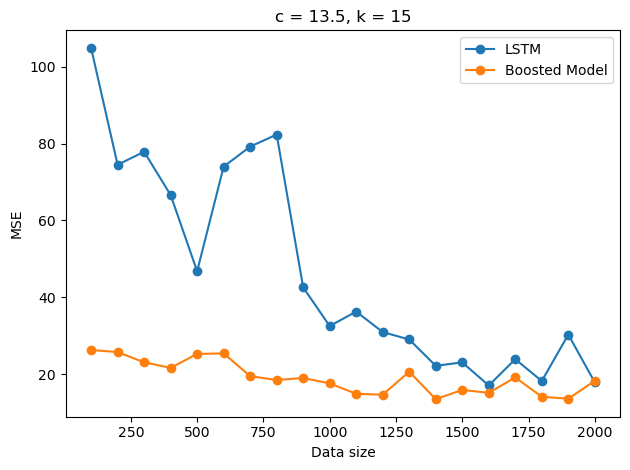

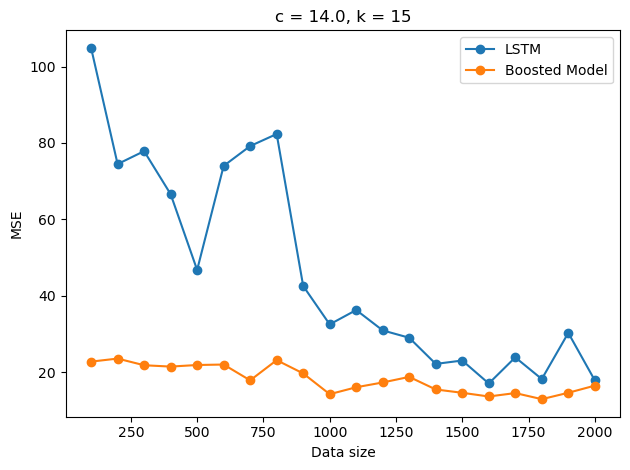

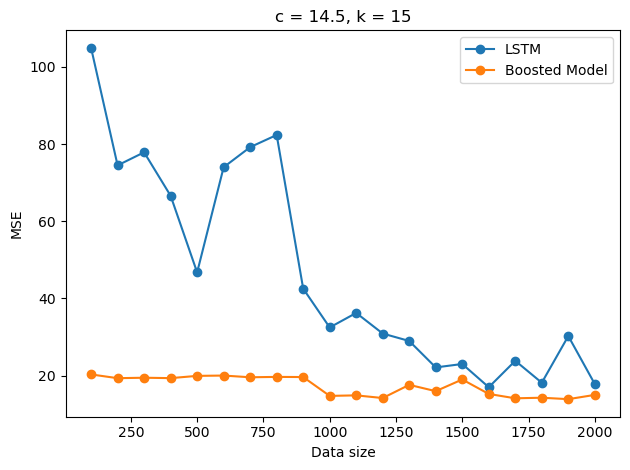

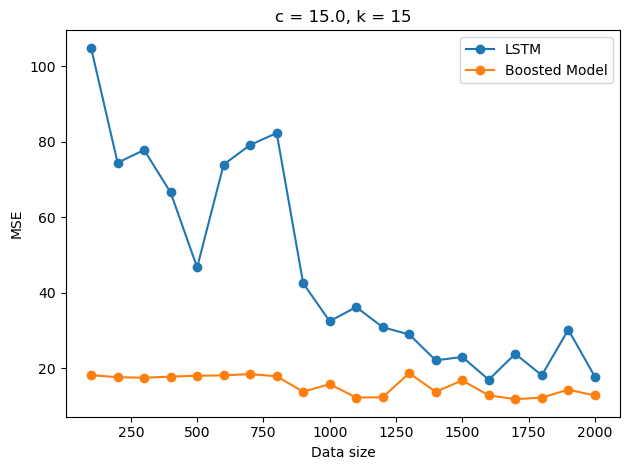

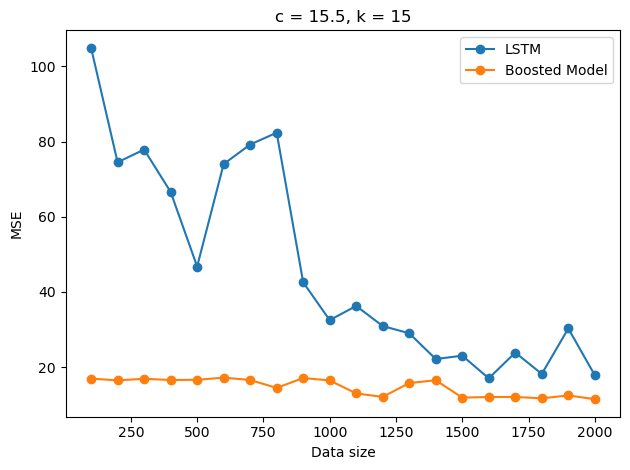

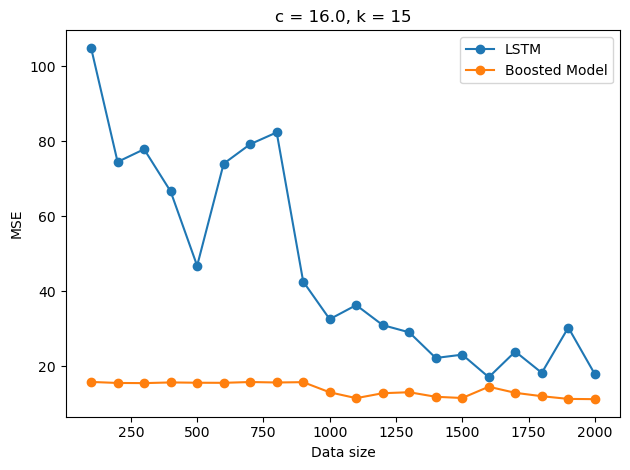

In [99]:
for k, c in configs:

  fig, ax = plt.subplots()
  # ax.set_yscale("log")
  ds_lstm_d_range.mse.sel(k=k).plot(ax=ax, marker="o", linestyle="-", label="LSTM")
  ds_boost_d_range2.mse.sel(c=c, k=k).plot(ax=ax, marker="o", linestyle="-", label="Boosted Model")


  ax.set_ylabel("MSE")
  ax.set_xlabel("Data size")
  fig.tight_layout()
  ax.legend()

  # fig.savefig(FIGURES / f"mse_vs_d_k{k}_c{c}.png", dpi=300, bbox_inches="tight")
  # plt.close(fig)  w

In [94]:
ds_boost_d_range

<xarray.Dataset> Size: 5kB
Dimensions:    (data_size: 20, c: 11, k: 3)
Coordinates:
  * data_size  (data_size) int32 80B 100 200 300 400 500 ... 1700 1800 1900 2000
  * c          (c) float64 88B 11.0 11.5 12.0 12.5 13.0 ... 14.5 15.0 15.5 16.0
  * k          (k) int32 12B 5 10 15
Data variables:
    mse        (k, data_size, c) float64 5kB ...
Attributes:
    patience:   20
    epcohs:     300
    test_size:  3000